### Multiple Classification(다중 분류 모델)
* 회로 기판이 불량이라면 어떤 유형의 불량인지를 출력하고자 함

#### 1. 환경설정

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

#### 2. 데이터 불러오기

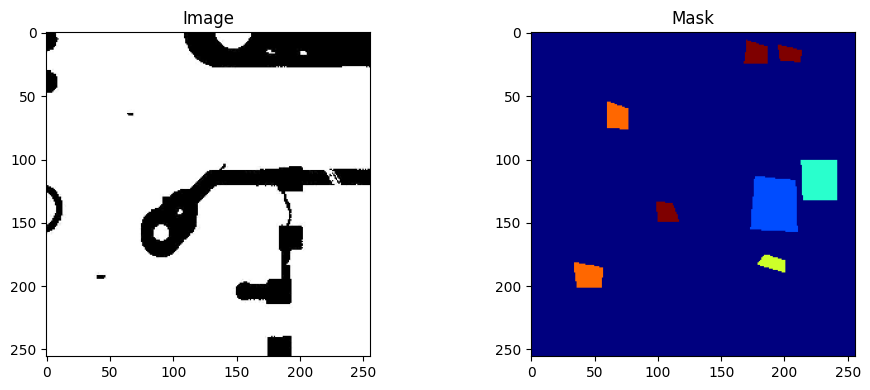

In [ ]:
#60개의 mask 이미지를 적용, Defect 이미지도 동일한 파일 60장을 따로 폴더를 만들어 저장, 불러옴
Defect_image_dir = "./DeepPCB_split/labeling/test_Defect"
mask_dir = "./DeepPCB_split/labeling/mask"
img_size = (256, 256)

def load_data(image_dir, mask_dir, img_size=(256, 256)):
    image_files = sorted(os.listdir(image_dir))
    images, masks = [], []

    mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.png')]    

    for file_name in image_files:
        # 1. 이미지 로드
        img = load_img(os.path.join(image_dir, file_name), target_size=img_size)
        img = img_to_array(img) / 255.0

        # 2. 마스크 파일명은 .png로 변경
        mask_file = file_name.replace('.jpg', '.png')  # 또는 .jpeg도 있으면 대응
        mask_path = os.path.join(mask_dir, mask_file)

        # 3. 마스크 로드
        mask = load_img(mask_path, target_size=img_size, color_mode='grayscale')
        mask = img_to_array(mask).squeeze().astype('int32')  # [H, W]

        # 4. 저장
        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)
#데이터 불러오기
images, masks = load_data(Defect_image_dir, mask_dir)
num_classes = np.max(masks) + 1
masks_cat = tf.keras.utils.to_categorical(masks, num_classes = num_classes)

def visualize_sample(images, masks, index=0):
    image = images[index]
    mask = masks[index]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(image)

    plt.subplot(1, 2, 2)
    plt.title("Mask")
    plt.imshow(mask.argmax(axis=-1), cmap='jet')

    plt.tight_layout()
    plt.show()

# 실행
visualize_sample(images, masks_cat, index=0)

In [8]:
# 데이터 분할(학습 / 검증 데이터로 나누기)
from sklearn.model_selection import train_test_split
print("전체 데이터 수:", images.shape[0])

# train:validation = 80:20으로 분할
X_train, X_val, y_train, y_val = train_test_split(
    images,           # 입력 이미지들 (N, 256, 256, 3)
    masks_cat,        # 원-핫 마스크들 (N, 256, 256, num_classes)
    test_size=0.2,    # 20%는 검증용으로 사용
    random_state=42,  # 결과 재현을 위한 시드값
    shuffle=True      # 데이터 섞기 (불량 클래스 고르게 분포)
)

# 결과 확인
print(f"✅ 학습 이미지 수: {X_train.shape[0]}")
print(f"✅ 검증 이미지 수: {X_val.shape[0]}")

전체 데이터 수: 61
✅ 학습 이미지 수: 48
✅ 검증 이미지 수: 13
